In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__


'1.2.1'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.labels[0:5, :]
data.test.cls = data.test.labels.argmax(axis=1)


In [6]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28
 # Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size
 # Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)
 # Number of classes, one class for each of 10 digits.
num_classes = 10

In [7]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float64, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [8]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [9]:
logits = tf.matmul(x, weights) + biases


In [10]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [11]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)


In [12]:
learning_value = tf.Variable(0.005, trainable=False)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_value).minimize(cost)


In [13]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
session = tf.Session()
session.run(tf.global_variables_initializer())
batch_size = 100
list1=[]


def optimize(num_iterations):
    print('learning - rate ')
    print(session.run(learning_value))

    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        _, cost_value = session.run([optimizer, cost], feed_dict=feed_dict_train) 
        list1.append(cost_value)#同时存下本轮的cost
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}


In [15]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))


In [16]:
list1 =[] #清空一下数据
optimize(num_iterations=100)
print_accuracy()
listy_1 = list1


learning - rate 
0.005
Accuracy on test-set: 74.3%


In [17]:
session.run(tf.global_variables_initializer())
session.run(learning_value.assign(0.15))
list1 =[] #清空一下数据
optimize(num_iterations=100)
print_accuracy()
listy_2 = list1


learning - rate 
0.15
Accuracy on test-set: 88.0%


In [18]:
session.run(tf.global_variables_initializer())
session.run(learning_value.assign(10))
list1 =[] #清空一下数据
optimize(num_iterations=100)
print_accuracy()
listy_3 = list1

learning - rate 
10.0
Accuracy on test-set: 76.0%


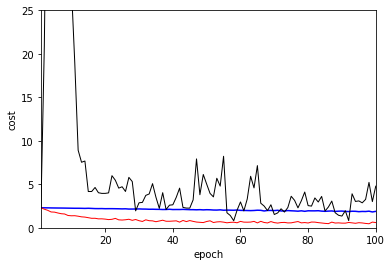

In [21]:
x_value = np.linspace(1, 100, 100)

plt.figure()
plt.plot(x_value, listy_1,color='blue')
# plot the second curve in this figure with certain parameters
plt.plot(x_value, listy_2, color='red', linewidth=1.0, linestyle='-')
plt.plot(x_value, listy_3, color='black', linewidth=1.0, linestyle='-')

# set x limits
plt.xlim((1, 100))
plt.ylim((0, 25))
plt.xlabel('epoch')
plt.ylabel('cost')

# set new sticks
new_ticks = np.linspace(-1, 2, 5)
# plt.xticks(new_ticks)
# set tick labels
#plt.yticks([-2, -1.8, -1, 1.22, 3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])
plt.show()

In [20]:
# session.run(tf.global_variables_initializer())
# optimize(num_iterations=1)
# print_accuracy()